In [1]:
# # Requerimientos de librerías:
# !pip install spacy
# !python -m spacy download es_core_news_md

# !pip install transformers
# !pip install transformers scipy ftfy accelerate

# !git clone https://github.com/JorgeSauri/COMSINT.git 

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
import numpy as np
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
from recomendaciones_comsint import Recomendador

c:\Users\jsaur\anaconda3\envs\ENV1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Con tamaño embeddings 128
- CNN de max 512 kernels (v4)

In [4]:
version = 4

recomendador128 = Recomendador(fuente='recetario_mexicano_small.csv',
                            nutricion = 'nutricion_mejorado.csv',
                            canasta='canasta_basica.csv')

recomendador128.CargarModelo(emb_size=128, version=version)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Modelo Modelos/Modelo_Nut_FV_DistilBERT_04_EMBED-128_CNN.h5 cargado con éxito.
Modelo Modelos/Modelo_Precios_FV_DistilBERT_04_EMBED-128_CNN.h5 cargado con éxito.


In [5]:
recomendador128.generar_dataset_entrenamiento_nut(df_nutricionales='nutricion_mejorado.csv', 
                                                  min_ingredientes=5, max_ingredientes=11,
                                                  min_unidades=1, max_unidades=5,
                                                  min_kcal=250, max_kcal= 1500,
                                                  numero_recetas=1
                                                  )

# recomendador128.generar_dataset_entrenamiento_precios(df_precios_profeco='lista_precios_profeco_2022.csv', 
#                                                   numero_recetas=1
#                                                   )                                  

Generando 1  recetas aleatorias...



100%|██████████| 1/1 [00:00<00:00, 50.13it/s]


array([['4 gramos de lentejas, 1 mililitros de carne de cerdo  cruda  degada y grasa separable  entera  hombro  fresco, 1 gramos de pato  crudo  hígado  domesticado, 4 piezas de albóndigas  estilo italiano  congelado, 4 mililitros de pollo crudo, 3 cucharaditas de edamame  sin preparación  congelado, 3 cucharaditas de flan  preparado con leche entera  mezcla seca  natillas de caramelo, 1 piezas de mcdonald\'s  big mac (sin salsa big mac), 1 piezas de moluscos  horneados o asados  concha, 2 tazas de carne de cerdo  migajas  cocidas  96% delgadas / 4% de grasa  molido3 cucharaditas de pan  enriquecido (incluye mezcla de muffins de maíz)  mezcla seca  pan de maíz, 4 onzas de queso  sin sodio agregado  1% de leche con leche  baja grasa  cabaña, 1 cucharaditas de cereales listos listos para comer y orgánicos más copos  el camino de la naturaleza, 2 onzas de uvas, 4 gramos de frijoles refritos  sin grasa  enlatados, 2 piezas de tomillo, 3 onzas de pavo molido crudo, 4 onzas de bebidas  endul

* Entrenar información nutricional


ITERACIÓN: 1
min unidades: 1  max unidades: 11
min kcal: 200  max kcal: 500
Entrenando desde epoch 0
------------------------------------------

Error al cargar archivos NumPy.
datasets/numpy/1000_recetas_random_EMBED-128_DATA_X.npy no existe o está corrupto.
datasets/numpy/1000_recetas_random_EMBED-128_DATA_Y.npy no existe o está corrupto.
Generando 1000  recetas aleatorias...



100%|██████████| 1000/1000 [00:14<00:00, 70.19it/s]


Calculando vector de características de 1000 recetas...


100%|██████████| 1000/1000 [43:05<00:00,  2.59s/it]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_4 (Batc  (None, 128, 768)         3072      
 hNormalization)                                                 
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

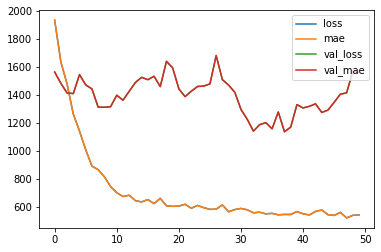

1/1 [==============================] - 0s 228ms/step - loss: 1060.4296 - mae: 1060.4296
[1060.4295654296875, 1060.4295654296875]
1/1 [==============================] - 0s 151ms/step
receta 0 kcal_true: 324.0 kcal_pred: 463.65765  precisión: 69.9 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 46.6485  precisión: 61.4 %
receta 0 protein_true: 8.0 protein_pred: 21.15519  precisión: 37.8 %
receta 0 total_fat_true: 0.0 total_fat_pred: 16.975376  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 359.80334  precisión: 82.5 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 36.595684  precisión: 38.1 %
receta 1 protein_true: 8.0 protein_pred: 16.608574  precisión: 48.2 %
receta 1 total_fat_true: 4.0 total_fat_pred: 12.557633  precisión: 31.9 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 14912.524  precisión: 5.7 %
receta 2 carbohydrate_t

100%|██████████| 1000/1000 [00:11<00:00, 89.86it/s]


Calculando vector de características de 1000 recetas...


100%|██████████| 1000/1000 [45:35<00:00,  2.74s/it] 


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_5 (Batc  (None, 128, 768)         3072      
 hNormalization)                                                 
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

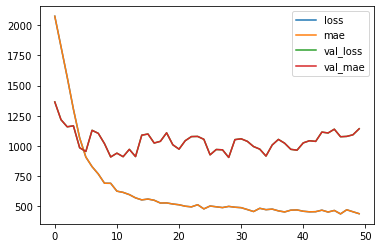

1/1 [==============================] - 0s 236ms/step - loss: 357.0163 - mae: 357.0163
[357.0163269042969, 357.0163269042969]
1/1 [==============================] - 0s 149ms/step
receta 0 kcal_true: 324.0 kcal_pred: 691.2754  precisión: 46.9 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 72.82512  precisión: 95.8 %
receta 0 protein_true: 8.0 protein_pred: 33.763756  precisión: 23.7 %
receta 0 total_fat_true: 0.0 total_fat_pred: 23.448542  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 438.4132  precisión: 99.4 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 46.268787  precisión: 48.2 %
receta 1 protein_true: 8.0 protein_pred: 21.152971  precisión: 37.8 %
receta 1 total_fat_true: 4.0 total_fat_pred: 14.842661  precisión: 26.9 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 7403.504  precisión: 11.4 %
receta 2 carbohydrate_true:

In [11]:
recomendador128.NUM_RECETAS = 100
recomendador128.EMB_SIZE = 128
ITER = 10
INITIAL_EPOCH = 0
EPOCHS = 50

Rangos_kcal = [
                (350, 1500),
                (300, 1000)           
              ]

Histories = []
for iteracion in range(ITER):
  MINU = 1 
  MAXU = 11  

  for ik in range(len(Rangos_kcal)):
    MINK, MAXK = Rangos_kcal[ik]
    print('\nITERACIÓN:', iteracion+1)
    print('min unidades:',MINU, ' max unidades:', MAXU)
    print('min kcal:', MINK, ' max kcal:', MAXK)
    print('Entrenando desde epoch', INITIAL_EPOCH)
    print('------------------------------------------\n')
    modelo128, history = recomendador128.EntrenarModelo(df_nutricionales='nutricion_mejorado.csv',
                                  #df_training='recipes_con_info_nutricional.csv',
                                  df_test='recetas_test.csv', 
                                  df_val='recetas_val.csv',
                                  learning_rate=1e-4,
                                  version=version, 
                                  initial_epoch = INITIAL_EPOCH,                             
                                  epochs=INITIAL_EPOCH + EPOCHS, 
                                  kernels=128,                                             
                                  min_ingredientes=5, max_ingredientes=11,
                                  min_unidades=MINU, max_unidades=MAXU,  
                                  min_kcal=MINK, max_kcal= MAXK,                             
                                  save=True, verbose=True)
    INITIAL_EPOCH = history.epoch[-1]

    Histories.append(history)


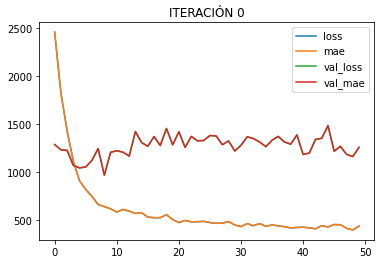

LOSS: 433.71820068359375  -- MAE: 433.71820068359375  -- VAL_LOSS: 1258.4879150390625  -- VAL_MAE: 1258.4879150390625
----------------------------------------------------------


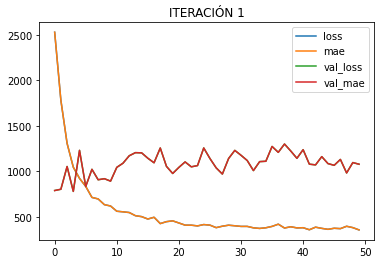

LOSS: 356.2850646972656  -- MAE: 356.2850646972656  -- VAL_LOSS: 1078.783447265625  -- VAL_MAE: 1078.783447265625
----------------------------------------------------------


In [7]:
for i in range(len(Histories)):
    history = Histories[i]    
    pd.DataFrame(history.history).plot()
    plt.title('ITERACIÓN ' + str(i))
    plt.show()
    print('LOSS:',history.history['loss'][-1], ' -- MAE:', history.history['mae'][-1], 
          ' -- VAL_LOSS:', history.history['val_loss'][-1], ' -- VAL_MAE:', history.history['val_mae'][-1])
    print('----------------------------------------------------------')

* Entrenar precios


ITERACIÓN: 1
Entrenando desde epoch 50
------------------------------------------

Generando 500  recetas aleatorias...



100%|██████████| 500/500 [00:00<00:00, 595.41it/s]


Calculando vector de características de 500 recetas...


100%|██████████| 500/500 [21:28<00:00,  2.58s/it]


Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_2 (Batc  (None, 128, 768)         3072      
 hNormalization)                                                 
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 123, 512)          0         
                                                                 
 CONV_2 (Conv1D)             (None, 121, 256)          393472    
                                                  

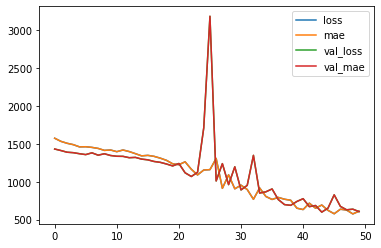

4/4 [==============================] - 1s 115ms/step - loss: 847.4523 - mae: 847.4523
[847.4522705078125, 847.4522705078125]
4/4 [==============================] - 0s 80ms/step
receta 0 precio_prom_por_gramo_true: 2.78 precio_prom_por_gramo_pred: 0.0  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 precio_prom_por_gramo_true: 520.0 precio_prom_por_gramo_pred: 561.4423  precisión: 92.6 %
---------------------------------------------------------------------------
receta 2 precio_prom_por_gramo_true: 4.15 precio_prom_por_gramo_pred: 0.0  precisión: 0.0 %
---------------------------------------------------------------------------
receta 3 precio_prom_por_gramo_true: 92.25 precio_prom_por_gramo_pred: 87.853516  precisión: 95.2 %
---------------------------------------------------------------------------
receta 4 precio_prom_por_gramo_true: 357.5 precio_prom_por_gramo_pred: 383.07895  precisión: 93.3 %
------------------------------------

100%|██████████| 500/500 [00:00<00:00, 641.17it/s]


Calculando vector de características de 500 recetas...


100%|██████████| 500/500 [21:52<00:00,  2.62s/it]


Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_3 (Batc  (None, 128, 768)         3072      
 hNormalization)                                                 
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 123, 512)          0         
                                                                 
 CONV_2 (Conv1D)             (None, 121, 256)          393472    
                                                  

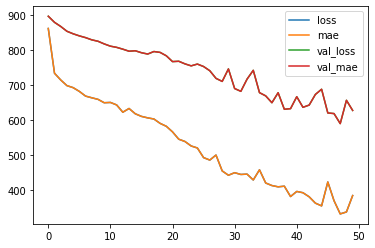

4/4 [==============================] - 1s 62ms/step - loss: 216.6416 - mae: 216.6416
[216.64161682128906, 216.64161682128906]
4/4 [==============================] - 0s 62ms/step
receta 0 precio_prom_por_gramo_true: 1361.0 precio_prom_por_gramo_pred: 1237.158  precisión: 90.9 %
---------------------------------------------------------------------------
receta 1 precio_prom_por_gramo_true: 1373.0 precio_prom_por_gramo_pred: 1550.5471  precisión: 88.5 %
---------------------------------------------------------------------------
receta 2 precio_prom_por_gramo_true: 113.1 precio_prom_por_gramo_pred: 112.99239  precisión: 99.9 %
---------------------------------------------------------------------------
receta 3 precio_prom_por_gramo_true: 296.2 precio_prom_por_gramo_pred: 348.843  precisión: 84.9 %
---------------------------------------------------------------------------
receta 4 precio_prom_por_gramo_true: 468.2 precio_prom_por_gramo_pred: 446.87906  precisión: 95.4 %
-------------------

In [8]:
recomendador128.NUM_RECETAS = 500
recomendador128.EMB_SIZE = 128
ITER = 2
INITIAL_EPOCH = 50
EPOCHS = 50


Histories_precios = []
for iteracion in range(ITER):
    print('\nITERACIÓN:', iteracion+1)
    print('Entrenando desde epoch', INITIAL_EPOCH)
    print('------------------------------------------\n')
    modelo128_precios, history_precios = recomendador128.EntrenarModeloPrecios(
                                    df_precios='lista_precios_profeco_2022.csv',                                   
                                    learning_rate=1e-3,
                                    version=version, 
                                    initial_epoch = INITIAL_EPOCH,                             
                                    epochs=INITIAL_EPOCH + EPOCHS, 
                                    kernels=128,                                                                         
                                    save=True, verbose=True)
    INITIAL_EPOCH = history_precios.epoch[-1]

    Histories_precios.append(history_precios)

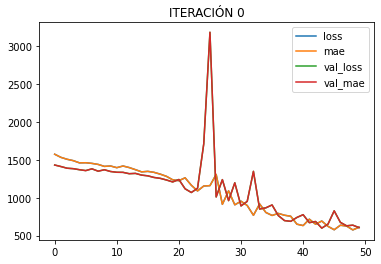

LOSS: 610.884521484375  -- MAE: 610.884521484375  -- VAL_LOSS: 605.876708984375  -- VAL_MAE: 605.876708984375
----------------------------------------------------------


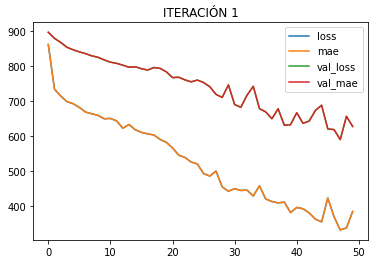

LOSS: 384.781494140625  -- MAE: 384.781494140625  -- VAL_LOSS: 627.9765014648438  -- VAL_MAE: 627.9765014648438
----------------------------------------------------------


In [10]:
for i in range(len(Histories_precios)):
    history = Histories_precios[i]    
    pd.DataFrame(history.history).plot()
    plt.title('ITERACIÓN ' + str(i))
    plt.show()
    print('LOSS:',history.history['loss'][-1], ' -- MAE:', history.history['mae'][-1], 
          ' -- VAL_LOSS:', history.history['val_loss'][-1], ' -- VAL_MAE:', history.history['val_mae'][-1])
    print('----------------------------------------------------------')